Aim
=====

The aim of this session is to familiarize yourselves with different feature selection techniques helpful for problems of precision medicine. For the purposes of this session, we are going to use a subset of the data from the [M&M Challenge](https://www.ub.edu/mnms/) as in the previous session.

We will work with algorithms from three different categories of supervised feature selection (filter, wrapper, and hybrid)
1.   Filter (Univariate: kbest, multivariate: rMRMR, Relief)
2.   Wrapper (Forward)
3.   Hybrid (Union, Voting, Ensemble)

Please note that since we did an exploratory analysis of the dataset we will skip this step. However, before starting with feature selection, you should always explore your data. More precisely, we could roughly distinguish the following steps for a classification problem:

  1. Define the problem
  2. Prepare the data
      * a.	Split into training and testing
      * b.	Exploratory analysis to get an understanding of the data
      * c.	Pre-process data
          * i.	Handle missing data
          * ii.	Handle categorical data
          * iii. Feature scaling for numerical data
          * iv.	Dimensionality reduction / Feature Selection / Remove correlated features
  3.	Train – Fit a model
        * a.	Choose an evaluation metric
        * b.	Fine-tune the model’s hyperparameters
  4.	Test – Make predictions
  5.	Evaluate the model
        * a.	Performance metrics beyond accuracy
        * b.	Interpret your model’s results e.g. by looking at feature importance

In this session we will focus mainly on the feature selection part, but we will include some basic pre-processing steps.

Dataset Information
=====================
The data is the same as with the previous session, i.e. radiomics extracted from the myocardium and left ventricle. Additional, information about two clinical variables, i.e. age and sex, is now provided.

For more details regarding the dataset, please the notebook of session and/or the [webpage](https://www.ub.edu/mnms/) of the challenge.

Author: Polyxeni Gkontra, Machine Learning for Precision Medicine, MBDS, 2024



Load the dataset
======


Load the libraries

In [2]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Upload the data file to colab

In [ ]:
#from google.colab import files
# Load the file - a window will prompt to choose from your local system
#uploaded = files.upload()

Read the file as a dataframe

In [6]:
# Load the data into a dataframe
data_all = pd.read_csv('Dataset\dataset_MandM_v2.csv')

Check statistical details of your data like counts, min, max etc

In [7]:
data_all.describe()

,Age,Weight,Volume_LV_ED,SurfaceArea_LV_ED,SurfaceAreatoVolumeRatio_LV_ED,Sphericity_LV_ED,Max3Ddiameter_LV_ED,Max2DdiameterSlice_LV_ED,Max2DdiameterColumn_LV_ED,Max2DdiameterRow_LV_ED,...,DependenceNonUniformityNormalized_gldm_MYO_ED,GrayLevelVariance_gldm_MYO_ED,DependenceVariance_gldm_MYO_ED,DependenceEntropy_gldm_MYO_ED,LowGrayLevelEmphasis_gldm_MYO_ED,HighGrayLevelEmphasis_gldm_MYO_ED,SmallDependenceLowGrayLevelEmphasis_gldm_MYO_ED,SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED,LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED,LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED
count,251.000000,47.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,51.629482,79.744681,162046.088853,19145.584096,0.124864,0.737209,99.455363,65.674674,95.435030,97.057432,...,0.052277,1.292970,34.823156,5.475271,0.699971,4.004964,0.013205,0.988374,140.311776,260.481397
std,17.832167,18.116133,65822.706317,4828.661779,0.018435,0.040932,12.550201,8.974664,12.567164,12.829282,...,0.008860,1.947136,7.988910,0.382242,0.113969,2.943905,0.002495,1.948519,44.511073,69.564387
min,15.000000,49.000000,45234.584600,9096.640159,0.075062,0.587200,64.897837,46.616570,54.500212,62.446743,...,0.039575,0.088329,11.900207,4.297861,0.385887,1.255675,0.007614,0.060197,32.912756,124.303575
25%,38.000000,67.500000,124564.770275,16119.402660,0.113299,0.711493,91.184317,59.225425,87.497664,88.995485,...,0.046142,0.479384,29.793182,5.247559,0.622695,2.368322,0.011447,0.285984,106.243998,213.999765
50%,52.000000,79.000000,147558.908500,18444.019975,0.123101,0.741921,99.468287,64.488550,95.759778,96.919236,...,0.050466,0.803537,34.586165,5.471577,0.705017,3.126985,0.012807,0.477550,140.128455,250.532409
75%,66.000000,88.500000,187324.980275,21365.008740,0.134481,0.769510,107.124425,70.865166,103.941238,105.549401,...,0.055970,1.376888,40.050012,5.736328,0.777759,4.653960,0.014798,0.936175,175.926557,287.359611
max,90.000000,126.000000,527307.836200,39503.157750,0.202592,0.805300,138.785279,99.983502,131.245693,137.830661,...,0.093682,23.652550,54.671400,6.584885,0.951562,27.910729,0.021778,24.826989,250.584183,580.390897


In [8]:
data_all.dtypes

Patient_id                                           object
Diagnosis                                            object
Age                                                 float64
Sex                                                  object
Weight                                              float64
                                                     ...   
HighGrayLevelEmphasis_gldm_MYO_ED                   float64
SmallDependenceLowGrayLevelEmphasis_gldm_MYO_ED     float64
SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED    float64
LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED     float64
LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED    float64
Length: 215, dtype: object

In [9]:
data_all.isna().sum()

Patient_id                                            0
Diagnosis                                             0
Age                                                  35
Sex                                                  36
Weight                                              239
                                                   ... 
HighGrayLevelEmphasis_gldm_MYO_ED                     0
SmallDependenceLowGrayLevelEmphasis_gldm_MYO_ED       0
SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED      0
LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED       0
LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED      0
Length: 215, dtype: int64

From the original dataframe, we will keep the diseases and columns of inetrest. Subsequently, we will create two separate dataframes: one that contains the features and one that contains the Diagnosis

In [11]:
# Column that contains the target classes
target = 'Diagnosis'
# Diseases of interest
dis_keep = ['HCM', 'NOR']
data_all = data_all[(data_all[target].isin(dis_keep))]
# Delete rows with NaNs
# Finds rows with nans
index_nan = data_all['Sex'].notnull()
# Keep only not nan
data_all = data_all[index_nan]

Print the names of the features

In [12]:
data_all.columns

Index(['Patient_id', 'Diagnosis', 'Age', 'Sex', 'Weight', 'Volume_LV_ED',
       'SurfaceArea_LV_ED', 'SurfaceAreatoVolumeRatio_LV_ED',
       'Sphericity_LV_ED', 'Max3Ddiameter_LV_ED',
       ...
       'DependenceNonUniformityNormalized_gldm_MYO_ED',
       'GrayLevelVariance_gldm_MYO_ED', 'DependenceVariance_gldm_MYO_ED',
       'DependenceEntropy_gldm_MYO_ED', 'LowGrayLevelEmphasis_gldm_MYO_ED',
       'HighGrayLevelEmphasis_gldm_MYO_ED',
       'SmallDependenceLowGrayLevelEmphasis_gldm_MYO_ED',
       'SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED',
       'LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED',
       'LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED'],
      dtype='object', length=215)

Check the number of patients per class

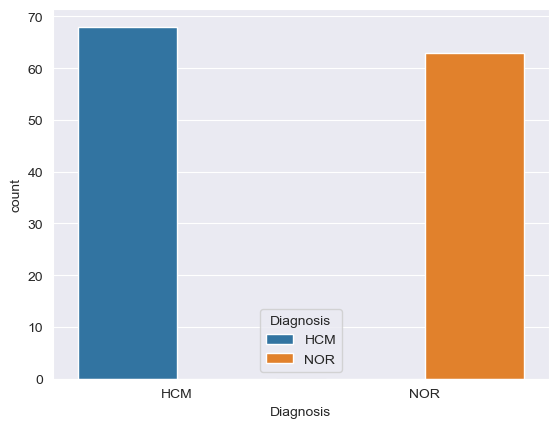

In [13]:
# Create a countplot with the number of patients per category
ax = sns.countplot(data = data_all, x=target, hue=target)

In [14]:
# Drop the column with patient id
data_all.drop(columns = ['Patient_id', 'Minimum_MYO_ED', 'Weight'], inplace = True)
# Create a dataframe with only the features
X_all = data_all.drop(columns = [target])
# Create another dataframe with the Diagnosis
Y_all = pd.DataFrame([], columns=[target])
Y_all[target] = data_all[target]
# Print the diseases
print(Y_all[target].unique())

['HCM' 'NOR']


Data preparation
================


Split the data into training and testing set. Here, we will follow a simple approach of using 80% of data for training and 20% for testing. Useful: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, shuffle=True, random_state=42)

Load libraries for encoding categical data and scaling numerical data.

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

We have to pre-process differently the categorical and numerical data. To this end, the first step if to identify the columns that correspond to numerical and those that correspond to categorical data. Useful: [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [17]:
# Numerical features
num_features = list(X_all.select_dtypes(include=["int64", "float64"]).columns)
# Indices of numerical features
numerical_idx = [loc for loc, key in enumerate(X_all.columns) if key in num_features]
# Indices of columns with categorical data
categorical_idx = list(set(range(0,X_train.shape[1])) - set(numerical_idx))
# Names of categorical features
cat_features = X_train.columns[categorical_idx]
# Print numerical features
print("Numerical features: ", num_features)
# Print categorical features
print("Categorical features: ", cat_features)

Numerical features:  ['Age', 'Volume_LV_ED', 'SurfaceArea_LV_ED', 'SurfaceAreatoVolumeRatio_LV_ED', 'Sphericity_LV_ED', 'Max3Ddiameter_LV_ED', 'Max2DdiameterSlice_LV_ED', 'Max2DdiameterColumn_LV_ED', 'Max2DdiameterRow_LV_ED', 'MajorAxis_LV_ED', 'MinorAxis_LV_ED', 'LeastAxis_LV_ED', 'Elongation_LV_ED', 'Flatness_LV_ED', 'Volume_MYO_ED', 'SurfaceArea_MYO_ED', 'SurfaceAreatoVolumeRatio_MYO_ED', 'Sphericity_MYO_ED', 'Max3Ddiameter_MYO_ED', 'Max2DdiameterSlice_MYO_ED', 'Max2DdiameterColumn_MYO_ED', 'Max2DdiameterRow_MYO_ED', 'MajorAxis_MYO_ED', 'MinorAxis_MYO_ED', 'LeastAxis_MYO_ED', 'Elongation_MYO_ED', 'Flatness_MYO_ED', 'Energy_LV_ED', 'TotalEnergy_LV_ED', 'Entropy_LV_ED', 'Minimum_LV_ED', 'Percentile10_LV_ED', 'Percentile90_LV_ED', 'Maximum_LV_ED', 'Mean_LV_ED', 'Median_LV_ED', 'InterquartileRange_LV_ED', 'Range_LV_ED', 'MeanAbsoluteDeviation_LV_ED', 'RobustMeanAbsoluteDeviation_LV_ED', 'RootMeanSquared_LV_ED', 'Skewness_LV_ED', 'Kurtosis_LV_ED', 'Variance_LV_ED', 'Uniformity_LV_ED', 'E

Adequately pre-process features depending on their type

1.   Encode categorical variables. Useful: [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) from pandas to perform one-hot key encoding. Keep in mind this is not the best option for tree based classifiers. Alternative when the categorical variable has an inherent order: [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
2.   Normalize numerical data. Useful: [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn-preprocessing-minmaxscaler)

Attention! 1. It is very important to treat testing and training data separately to avoid data leakage 2. Methods fit_transform (for training data) and tranfrom (for the testing data) can be very helpful. Alternatively we could use [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) from [sklearn](https://scikit-learn.org/stable/index.html) or [imbalanced-learn](https://imbalanced-learn.org/stable/).

In [18]:
# Function to help with one hot key encoding with pandas. Reproduced from
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [19]:
# importing copy module
import copy
# Create copies of the features
X_train_enc = copy.deepcopy(X_train);
X_test_enc = copy.deepcopy(X_test);
# Handle categorical variables
print(cat_features)
# Get one hot encoding of columns cat_features
for i in cat_features:
  X_train_enc = encode_and_bind(X_train_enc, i)
  X_test_enc = encode_and_bind(X_test_enc, i)
# Normalize the numerical values using MinMaxScaler for train and test data
num_preprocessor = MinMaxScaler()
X_train_enc[num_features] = num_preprocessor.fit_transform(X_train_enc.loc[:,num_features])
X_test_enc[num_features] = num_preprocessor.transform(X_test_enc.loc[:,num_features])

Index(['Sex'], dtype='object')


Transfrom the labels using the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [20]:
# Define transform for the target labels - attention! LabelEncoder is for target variables only!
label_encode = LabelEncoder()
# Fit and transform the training data
Y_train_enc = label_encode.fit_transform(Y_train)
# Transform the testing data
Y_test_enc = label_encode.transform(Y_test)

C:\Anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Verify everything is correct

In [21]:
# Check the first five rows of the encoded features
X_train_enc.head()

,Age,Volume_LV_ED,SurfaceArea_LV_ED,SurfaceAreatoVolumeRatio_LV_ED,Sphericity_LV_ED,Max3Ddiameter_LV_ED,Max2DdiameterSlice_LV_ED,Max2DdiameterColumn_LV_ED,Max2DdiameterRow_LV_ED,MajorAxis_LV_ED,...,DependenceVariance_gldm_MYO_ED,DependenceEntropy_gldm_MYO_ED,LowGrayLevelEmphasis_gldm_MYO_ED,HighGrayLevelEmphasis_gldm_MYO_ED,SmallDependenceLowGrayLevelEmphasis_gldm_MYO_ED,SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED,LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED,LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED,Sex_F,Sex_M
117,0.720000,0.250739,0.315614,0.473739,0.502159,0.378112,0.300185,0.518728,0.400816,0.384425,...,0.383151,0.361643,0.621407,0.101710,0.703269,0.112520,0.340591,0.192088,1,0
83,0.320000,0.490793,0.634748,0.337364,0.357750,0.677779,0.704023,0.681374,0.641064,0.828965,...,0.287181,0.224875,0.677663,0.042118,0.692692,0.022820,0.328003,0.163616,0,1
0,0.920000,0.219200,0.314479,0.587552,0.358064,0.272996,0.513986,0.410121,0.288744,0.308357,...,0.203002,0.404674,0.462400,0.109102,0.504184,0.034296,0.235930,0.330647,0,1
12,0.506667,0.601215,0.645943,0.155077,0.636149,0.735075,0.471811,0.808549,0.749604,0.866170,...,0.511045,1.000000,0.000000,1.000000,0.446299,1.000000,0.205927,0.806369,0,1
78,0.493333,0.670257,0.672805,0.084462,0.741411,0.716855,0.462783,0.821817,0.725742,0.764210,...,0.680128,0.513063,0.611299,0.144371,0.295415,0.159879,0.589819,0.472224,0,1


In [22]:
# Review the number of samples, features, types of data, target values before proceeding with feature selection
print(Y_train_enc.shape)
print(X_train_enc.shape)
print(X_train_enc.dtypes)
np.unique(Y_train_enc)

(104,)
(104, 212)
Age                                                 float64
Volume_LV_ED                                        float64
SurfaceArea_LV_ED                                   float64
SurfaceAreatoVolumeRatio_LV_ED                      float64
Sphericity_LV_ED                                    float64
                                                     ...   
SmallDependenceHighGrayLevelEmphasis_gldm_MYO_ED    float64
LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED     float64
LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED    float64
Sex_F                                                 uint8
Sex_M                                                 uint8
Length: 212, dtype: object


array([0, 1])

Univariate Filter methods
=======
------------------------
K-best
=========================

In this section we are going to experiment with filter methods and more precisely with a filtering approach that allows us to retain the k features with the higherst scores known as k-best.

Import relevant libraries

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

Select features based on the k-highest scores. Useful: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn-feature-selection-selectkbest) from scikit-learn. SelectKBest offers several evaluation methods ([ANOVA f statistic](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn-feature-selection-f-classif), [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn-feature-selection-chi2), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn-feature-selection-mutual-info-classif) etc.).

In [24]:
# Configure to select all features
fs1 = SelectKBest(score_func=f_classif, k = 'all')
# Learn relationship from training data
fs1 = fs1.fit(X_train_enc, Y_train_enc)
# Transform train data
X_train_fs = fs1.transform(X_train_enc)
# Transform test data
X_test_fs = fs1.transform(X_test_enc)

Get the p-values calculated for each feature and create a plot

In [25]:
# Get the pvalues
kbest_scores = -np.log10(fs1.pvalues_)
cols = fs1.get_support(indices=True)
# Selected_columns
print(cols)
# Normalize
kbest_scores /= kbest_scores.max()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211]


In [26]:
print("The negative log of the pvalues is: ", -np.log10(fs1.pvalues_))

The negative log of the pvalues is:  [4.41204400e+00 7.56026908e-02 5.80137731e-01 1.04930809e+00
 3.50655850e+00 1.25696594e-02 1.62071122e+00 6.20815100e-02
 1.18155015e-01 1.36319512e-01 9.19842300e-01 5.65966384e-01
 9.82220176e-01 7.67500734e-01 6.02461695e+00 1.54622396e+00
 9.48393981e+00 7.93626580e+00 7.45746431e-01 6.50817434e+00
 3.02876908e-01 4.84661703e-01 6.64350916e-01 1.94232842e+00
 1.54180087e-01 4.64804848e-01 4.70414132e-01 3.71589542e-01
 6.98798740e-02 2.06671240e-01 1.71438944e+00 1.79816218e+00
 1.35991239e-01 1.76305512e+00 4.60915841e-02 3.92786330e-02
 3.03827719e-01 1.75683379e+00 3.85809384e-01 2.11076188e-01
 2.66448791e-01 1.23244965e+00 1.36584177e+00 4.34484839e-01
 2.77474449e-02 3.69387999e+00 3.26906327e+00 1.07001663e+01
 1.04701144e+01 8.73973426e+00 1.52598110e+00 9.34671222e+00
 1.05103232e+01 1.15501752e+01 1.52598110e+00 8.02888587e+00
 1.12114495e+01 6.84167051e+00 2.16496447e-01 1.99530501e-01
 2.98879948e+00 1.28579353e+01 1.80660482e-01 7.

Plot the kbest_scores for the features with p-value below a threshold. We plot the negative log of the pvalues, thus the higher the more relevant the feature is

Number of features: 63


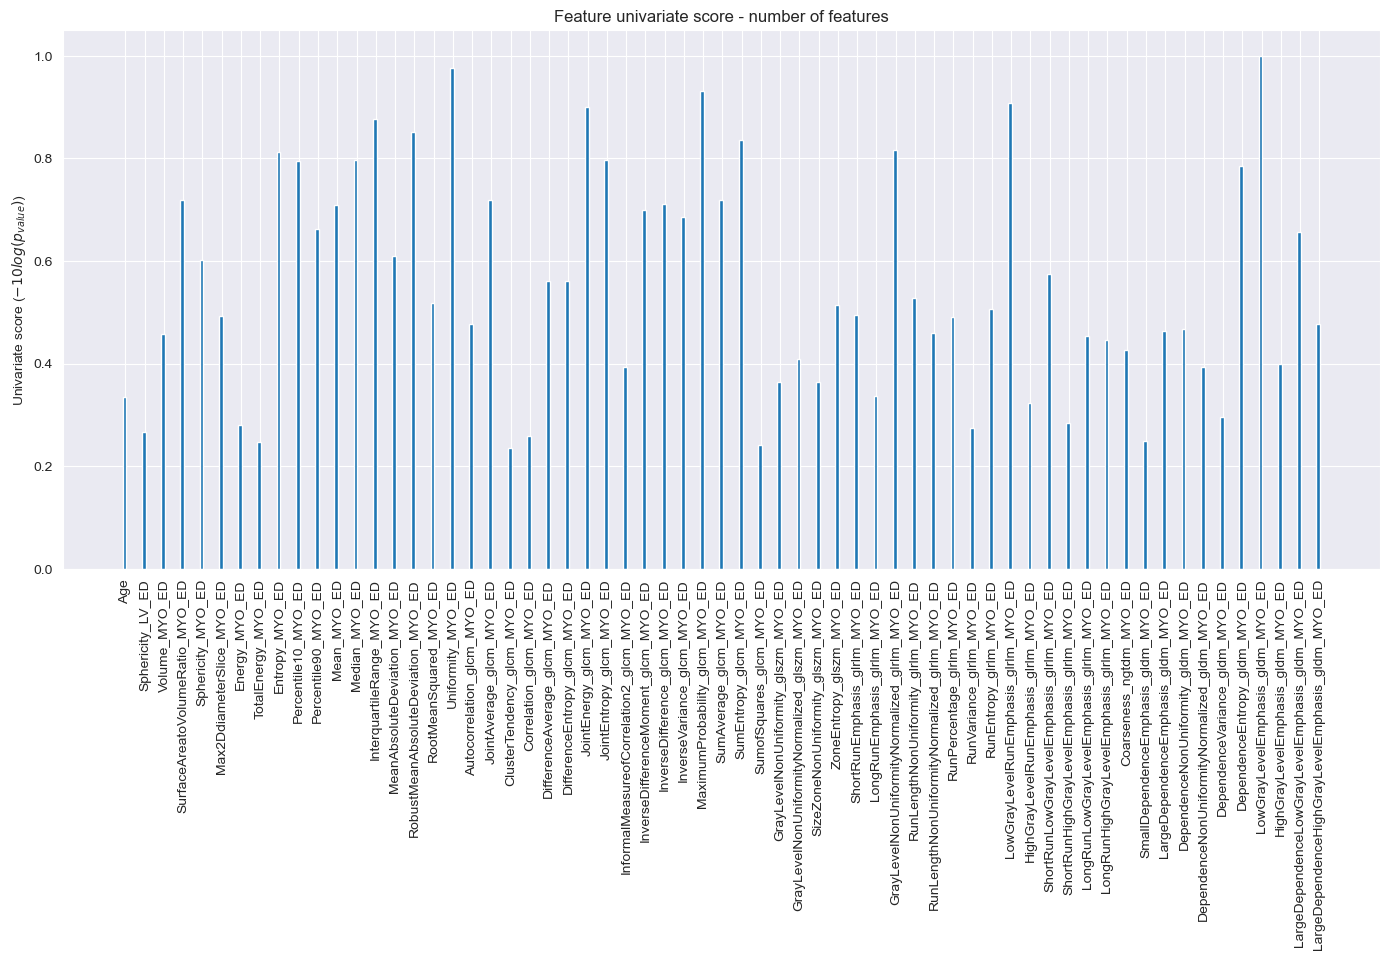

In [27]:
# Keep only the features with p-value below a threshold
cols = np.where(fs1.pvalues_<0.001)[0]
temp = X_train.iloc[:,cols]
X_indices = np.arange(temp.shape[-1])
print("Number of features:", temp.shape[1])
# Create the plot
plt.figure(figsize=(17,7))
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, kbest_scores[cols], width=0.2)
plt.title("Feature univariate score - number of features")
plt.xticks(range(0,len(cols)),X_train_enc.columns[cols], rotation=90)
plt.ylabel("Univariate score ($-10 log(p_{value})$)")
plt.show()


Repeat the transformation with the number of features we calculated earlier that have p-values<0.001

In [28]:
# We can re-run transform or just get the features using cols
fs_kbest = SelectKBest(score_func=f_classif, k = len(cols))
# Learn relationship from training data
fs_kbest = fs_kbest.fit(X_train_enc, Y_train_enc)
# Transform the train and test data
X_train_kbest = fs_kbest.transform(X_train_enc)
X_test_kbest = fs_kbest.transform(X_test_enc)
# The number of the retained features
print("Number of retained features: ", X_train_kbest.shape[1])

Number of retained features:  63


In [29]:
# Add features in a list for use later with the ensemble model
features_selected_lists = []
features_selected_lists.append(list(X_train_enc.columns[cols]))
print(features_selected_lists)

[['Age', 'Sphericity_LV_ED', 'Volume_MYO_ED', 'SurfaceAreatoVolumeRatio_MYO_ED', 'Sphericity_MYO_ED', 'Max2DdiameterSlice_MYO_ED', 'Energy_MYO_ED', 'TotalEnergy_MYO_ED', 'Entropy_MYO_ED', 'Percentile10_MYO_ED', 'Percentile90_MYO_ED', 'Mean_MYO_ED', 'Median_MYO_ED', 'InterquartileRange_MYO_ED', 'MeanAbsoluteDeviation_MYO_ED', 'RobustMeanAbsoluteDeviation_MYO_ED', 'RootMeanSquared_MYO_ED', 'Uniformity_MYO_ED', 'Autocorrelation_glcm_MYO_ED', 'JointAverage_glcm_MYO_ED', 'ClusterTendency_glcm_MYO_ED', 'Correlation_glcm_MYO_ED', 'DifferenceAverage_glcm_MYO_ED', 'DifferenceEntropy_glcm_MYO_ED', 'JointEnergy_glcm_MYO_ED', 'JointEntropy_glcm_MYO_ED', 'InformalMeasureofCorrelation2_glcm_MYO_ED', 'InverseDifferenceMoment_glcm_MYO_ED', 'InverseDifference_glcm_MYO_ED', 'InverseVariance_glcm_MYO_ED', 'MaximumProbability_glcm_MYO_ED', 'SumAverage_glcm_MYO_ED', 'SumEntropy_glcm_MYO_ED', 'SumofSquares_glcm_MYO_ED', 'GrayLevelNonUniformity_glszm_MYO_ED', 'GrayLevelNonUniformityNormalized_glszm_MYO_ED', 

An alternative to k-best for univariate feature selection is [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html). Try it out to see if any differences are observed.

Multivariate filter methods
===========================
----------------------------

ReliefF
======
In this section, we are going to apply the ReliefF algorithm, an extention of the basic Relief offering support for multi-class problems, missing data while it takes into account k neighbors. The family of Relief algorithms belong to multivariate feature selection algorithms. These methods try to identify attributes based on how well they can distinguish samples that are close to each other.

Install the [skrebate](https://epistasislab.github.io/scikit-rebate/) package, a suite of Relief-based feature selection algorithms for Machine Learning. The implementation of these algorithms is based on the paper of [Urbanowicza et al., 2018](https://www.sciencedirect.com/science/article/pii/S1532046418301400)

In [30]:
!pip install skrebate

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29266 sha256=d916e8790de2aad911e1ccf0c4559d455142eaf85e38e64eb581e760afb7c8ab
  Stored in directory: c:\users\csanchez\appdata\local\pip\cache\wheels\f1\e9\45\af58ad8046c6a6ff83f2ff6e38284a8a9707c955b2a1d0de36
Successfully built skrebate


In [31]:
from skrebate import ReliefF

Call the Relief algorithm asking for a random number of features. Useful: [ReliefF](https://epistasislab.github.io/scikit-rebate/using/#relieff)

In [32]:
# Number of features to retain
n_features = 30
# Define the transform
reliefFS = ReliefF(n_features_to_select=n_features, n_neighbors=100, n_jobs = -1)
# Learn and apply to the train data
X_train_relief = reliefFS.fit_transform(X_train_enc.values, Y_train_enc)
print("Number of features before feature selection) : ", X_train_enc.shape)
print("Number of features after Relief feature selection) : ", X_train_relief.shape)
# Apply to the test data
X_test_relief = reliefFS.transform(X_test_enc.values)

Number of features before feature selection) :  (104, 212)
Number of features after Relief feature selection) :  (104, 30)


Get the scores of the features

In [33]:
# Scores
relief_scores = reliefFS.feature_importances_
print(relief_scores)

[ 1.00678253e-01  6.39100943e-03  1.48871110e-02  1.75983807e-02
  8.30463531e-02  2.47098798e-03  2.44491892e-02  1.61623861e-02
  6.01280052e-03  4.70226432e-03  1.29970341e-02  1.01706619e-02
  2.10757335e-02  1.87484195e-02  8.21776699e-02  2.08484702e-02
  1.67114003e-01  1.48251180e-01  5.21613418e-03  1.04481398e-01
  1.15383053e-02  5.22358259e-03  1.72734863e-02  2.35407724e-02
  1.34606892e-02  1.12466346e-02  1.17375585e-02  2.35065716e-02
  2.15645574e-02  9.67677537e-04  2.71206009e-02  2.90051467e-02
  7.75549879e-03  1.41480318e-02  4.01212946e-04  1.00208632e-04
  4.95162697e-03  1.41784720e-02  1.07402600e-02  4.29965455e-03
  1.11055996e-02  1.56982836e-02  2.24408646e-02  1.64015345e-02
  3.44001858e-03  1.01458077e-01  9.60838348e-02  1.93515578e-01
  1.92712720e-01  2.15070324e-01  2.96653366e-02  2.06831279e-01
  2.01481702e-01  2.39295941e-01  2.96653366e-02  1.96512676e-01
  2.44506036e-01  1.72018335e-01  1.17533227e-02  2.80016212e-03
  7.99673917e-02  2.37363

Create a plot with scores

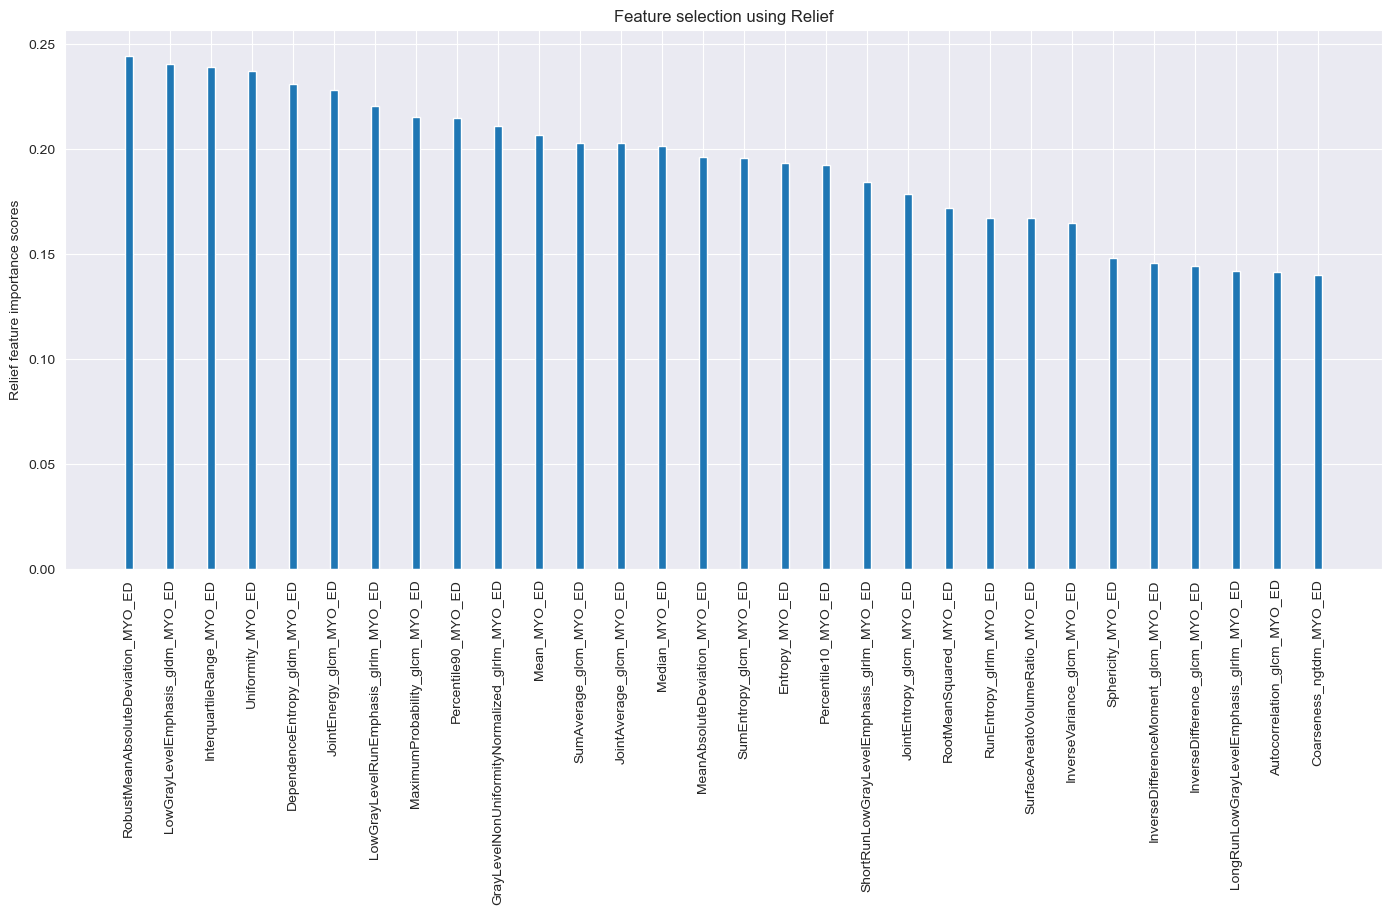

In [34]:
# Keep the n most important
cols = reliefFS.top_features_
feat = cols[:30]
# Create the plot
plt.figure(figsize=(17,7))
plt.figure(1)
plt.clf()
plt.bar(range(0, len(relief_scores[feat])), relief_scores[feat], width=0.2)
plt.title("Feature selection using Relief")
plt.xticks(range(0, len(relief_scores[feat])),X_train_enc.columns[feat], rotation=90)
plt.ylabel("Relief feature importance scores")
plt.show()

In [35]:
# Add features in a list for use later with the ensemble model
features_selected_lists.append(list(X_train_enc.columns[feat]))

Calculate the correlation between the kbest approach and the relief feature selection method. Create a common plot with the features from the kbest selection for comparison purposes based on https://github.com/PadraigC/FeatSelTutorial/blob/main/FS-ReliefF.ipynb

In [36]:
# Create a dataframe that contains the scores of the two methods and feature names
feature_names = X_train_enc.columns
df=pd.DataFrame({'Kbest':kbest_scores,'ReliefF':relief_scores,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Kbest', inplace = True, ascending = False)

Calculate the non-linear correlation using spearman coefficient. Useful: [spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) from stats

In [37]:
# Use spearman correlation
from scipy import stats
stats.spearmanr(relief_scores, kbest_scores)

SpearmanrResult(correlation=0.8462045394077495, pvalue=2.51465999780798e-59)

Plot the scores from the two approaches

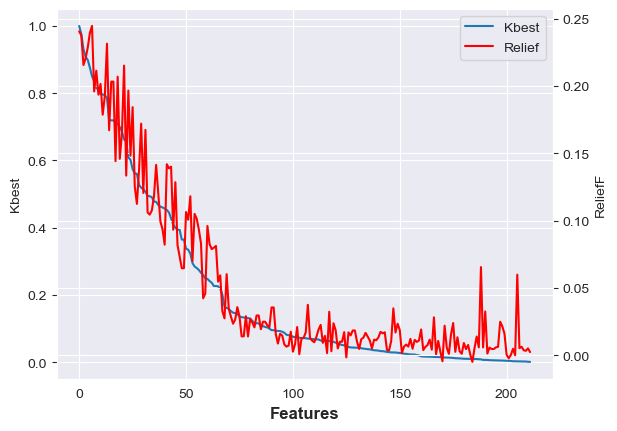

In [38]:
fig, ax = plt.subplots()
rr = range(0,len(feature_names))
# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()
ax.plot(range(0,df.shape[0]), df["Kbest"], label='Kbest')
ax2.plot(range(0,df.shape[0]), df["ReliefF"], color='red', label='Relief')

ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Kbest')
ax2.set_ylabel('ReliefF')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes);

Minimum redundancy maximum relevance
=====================================================

There exist multiple implementations of the mRMR alogithm. Here we are going to work with https://pypi.org/project/mrmr-selection/, but you could also consider the [PymRMR package ](https://pypi.org/project/pymrmr/) among others.

In [ ]:
!pip install mrmr_selection

In [39]:
from mrmr import mrmr_classif
# Use mrmr classification
selected_features = mrmr_classif(X_train_enc, Y_train_enc, K = 10)
print(selected_features)

100%|██████████| 10/10 [00:00<00:00, 24.24it/s]


['LowGrayLevelEmphasis_gldm_MYO_ED', 'HighGrayLevelZoneEmphasis_glszm_LV_ED', 'MinorAxis_MYO_ED', 'Uniformity_MYO_ED', 'MaximumProbability_glcm_MYO_ED', 'LowGrayLevelRunEmphasis_glrlm_MYO_ED', 'JointEnergy_glcm_MYO_ED', 'InterquartileRange_MYO_ED', 'Max2DdiameterSlice_MYO_ED', 'RobustMeanAbsoluteDeviation_MYO_ED']


Transform the data

In [40]:
# Retain only those features for the training data
X_train_mrmr = X_train_enc.loc[:,selected_features]
# Retain only those features for the testing data
X_test_mrmr = X_test_enc.loc[:,selected_features]

Add to the features_selected_lists

In [41]:
features_selected_lists.append(list(selected_features))

Wrapper methods
================

In this section we are going to work with wrapper methods. These methods use the performance of a ML model to select the most informative features, so remember that you will need to choose a classifier. This part of the notebook is based on http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-6-feature-selection-with-fixed-trainvalidation-splits

Import libraries for the classifier to be used for evaluating the different subsets of feature

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)

Install the library [mltexnd](http://rasbt.github.io/mlxtend/)

In [43]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 7.2 MB/s eta 0:00:00
     --------------------------------------- 11.2/11.2 MB 26.1 MB/s eta 0:00:00


Import modules for SFS and relevant plotting

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Sequential feature selection

In [48]:
sfs1 = SFS(knn,
           k_features=10,
           forward=True,
           floating=False,
           verbose=0,
           scoring='accuracy',
           cv=3)

sfs1 = sfs1.fit(X_train_enc, Y_train_enc)

Let's look at the selected features of each step of the selection process

In [49]:
sfs1.subsets_

{1: {'feature_idx': (85,),
  'cv_scores': array([0.68571429, 0.85714286, 0.85294118]),
  'avg_score': 0.7985994397759103,
  'feature_names': ('Autocorrelation_glcm_MYO_ED',)},
 2: {'feature_idx': (24, 85),
  'cv_scores': array([0.71428571, 0.91428571, 0.85294118]),
  'avg_score': 0.827170868347339,
  'feature_names': ('LeastAxis_MYO_ED', 'Autocorrelation_glcm_MYO_ED')},
 3: {'feature_idx': (24, 59, 85),
  'cv_scores': array([0.8       , 0.82857143, 0.91176471]),
  'avg_score': 0.8467787114845938,
  'feature_names': ('LeastAxis_MYO_ED',
   'Kurtosis_MYO_ED',
   'Autocorrelation_glcm_MYO_ED')},
 4: {'feature_idx': (24, 59, 85, 178),
  'cv_scores': array([0.82857143, 0.85714286, 0.97058824]),
  'avg_score': 0.8854341736694678,
  'feature_names': ('LeastAxis_MYO_ED',
   'Kurtosis_MYO_ED',
   'Autocorrelation_glcm_MYO_ED',
   'Contrast_ngtdm_MYO_ED')},
 5: {'feature_idx': (24, 59, 85, 88, 178),
  'cv_scores': array([0.85714286, 0.85714286, 0.97058824]),
  'avg_score': 0.8949579831932772,
  

Plot the performance of the model. Useful: [plot_sfs](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_sequential_feature_selection/)

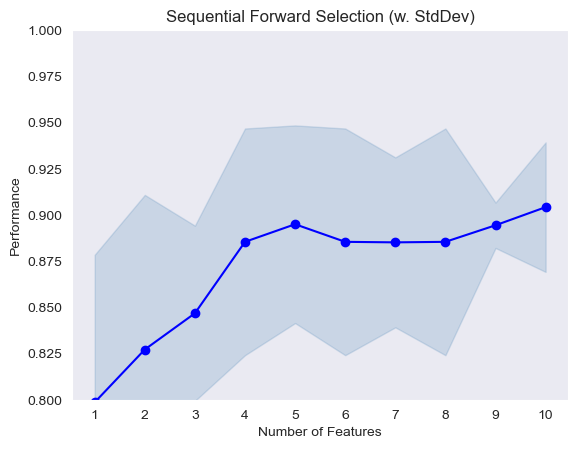

In [50]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Convert the results in pandas dataframe for better exploration

In [51]:
results = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
# See the first rows of the results
results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(85,)","[0.6857142857142857, 0.8571428571428571, 0.852...",0.798599,"(Autocorrelation_glcm_MYO_ED,)",0.179667,0.07984,0.056456
2,"(24, 85)","[0.7142857142857143, 0.9142857142857143, 0.852...",0.827171,"(LeastAxis_MYO_ED, Autocorrelation_glcm_MYO_ED)",0.188259,0.083658,0.059155
3,"(24, 59, 85)","[0.8, 0.8285714285714286, 0.9117647058823529]",0.846779,"(LeastAxis_MYO_ED, Kurtosis_MYO_ED, Autocorrel...",0.106687,0.047409,0.033523
4,"(24, 59, 85, 178)","[0.8285714285714286, 0.8571428571428571, 0.970...",0.885434,"(LeastAxis_MYO_ED, Kurtosis_MYO_ED, Autocorrel...",0.138018,0.061332,0.043369
5,"(24, 59, 85, 88, 178)","[0.8571428571428571, 0.8571428571428571, 0.970...",0.894958,"(LeastAxis_MYO_ED, Kurtosis_MYO_ED, Autocorrel...",0.120345,0.053479,0.037815


Transform the data



In [52]:
# Transform the training data
X_train_sfs = sfs1.transform(X_train_enc)
# Transform the testing data
X_test_sfs = sfs1.transform(X_test_enc)

Add to the features_selected_lists list

In [53]:
# Append features
features_selected_lists.append(list(sfs1.k_feature_names_))

On your own time, repeat the process with backward feature selection to compare the results.

Hybrid
=======

Ensemble methods
=====================

We can simple combine the results from the different apporaches. One simplistic approach is to use the union or voting. More advanced techniques involve training a classifier for each subset and then combining the results.
The code of this part of the notebook originates at:
https://medium.com/@vatvenger/combining-feature-selection-methods-cdb4ae5be979

Intersection & Union

In [54]:
features_selected_sets = []
for features_list in features_selected_lists:
    features_selected_sets.append(set(features_list))
# Intersection
intersection = set.intersection(*features_selected_sets)
print('Intersection', intersection)
# Union
union = list(set.union(*features_selected_sets))
print('Union', union)

Intersection set()
Union ['SurfaceAreatoVolumeRatio_MYO_ED', 'Median_MYO_ED', 'MaximumProbability_glcm_MYO_ED', 'JointEntropy_glcm_MYO_ED', 'ClusterShade_glcm_MYO_ED', 'HighGrayLevelRunEmphasis_glrlm_MYO_ED', 'LeastAxis_MYO_ED', 'DifferenceEntropy_glcm_MYO_ED', 'SumAverage_glcm_MYO_ED', 'RobustMeanAbsoluteDeviation_MYO_ED', 'Correlation_glcm_MYO_ED', 'LongRunHighGrayLevelEmphasis_glrlm_MYO_ED', 'MinorAxis_MYO_ED', 'RunEntropy_glrlm_MYO_ED', 'DifferenceAverage_glcm_MYO_ED', 'SizeZoneNonUniformity_glszm_MYO_ED', 'LargeDependenceLowGrayLevelEmphasis_gldm_MYO_ED', 'LongRunLowGrayLevelEmphasis_glrlm_MYO_ED', 'LowGrayLevelEmphasis_gldm_MYO_ED', 'InverseDifference_glcm_MYO_ED', 'Age', 'Energy_MYO_ED', 'SumEntropy_glcm_MYO_ED', 'Coarseness_ngtdm_MYO_ED', 'ZonePercentage_glszm_MYO_ED', 'RunPercentage_glrlm_MYO_ED', 'LargeDependenceHighGrayLevelEmphasis_gldm_MYO_ED', 'GrayLevelNonUniformityNormalized_glszm_MYO_ED', 'Sphericity_LV_ED', 'ShortRunHighGrayLevelEmphasis_glrlm_MYO_ED', 'GrayLevelNonUn

Voting

In [55]:
from collections import Counter
flat_list = [item for sublist in features_selected_lists for item in sublist]
min_votes = 3
counter = Counter(list(flat_list)) # list of lists
features_voted = [k for k, v in counter.items() if v >= min_votes]
print("Final features after voting:", features_voted)
print("Number of final features after voting:", len(features_voted))


Final features after voting: ['Max2DdiameterSlice_MYO_ED', 'InterquartileRange_MYO_ED', 'RobustMeanAbsoluteDeviation_MYO_ED', 'Uniformity_MYO_ED', 'Autocorrelation_glcm_MYO_ED', 'JointEnergy_glcm_MYO_ED', 'MaximumProbability_glcm_MYO_ED', 'LowGrayLevelRunEmphasis_glrlm_MYO_ED', 'LowGrayLevelEmphasis_gldm_MYO_ED']
Number of final features after voting: 9


In [56]:
# Add them in the list of lists
features_selected_lists.append(union)
features_selected_lists.append(features_voted)
# Total number of feature combinations
print(len(features_selected_lists))

6


Comparison among all methods using classification
=====================================================

Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to compare among methods. Tip: You have features from each method in list features_selected_lists

In [57]:
#Training
models = []
models_features = []
fs_technique = ['kbest', 'Relief','mRMR','SFS','Union', 'Voting']
for i, features_list in enumerate(features_selected_lists):
    clf = knn;
    # Train the machine learning model
    clf.fit(X_train_enc[features_list], Y_train_enc)
    # Predict the outcome for the test set
    y_pred = clf.predict(X_test_enc[features_list])
    # Calculate and print the classication report including
    print('Classification report for testing data ' + fs_technique[i])
    print(classification_report(Y_test_enc, y_pred)) # attention! - order of arguments matters!

Classification report for testing data kbest
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.92      0.92        13

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27

Classification report for testing data Relief
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.85      0.88        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27

Classification report for testing data mRMR
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.77      0.87        13

    accuracy                           0.89    

Create a plot

Hands-on!
=========

You are now ready to make your own hybrid feature selection method by combining some of the methods you learned during this session. Let's try it out and see the results!